# IRIS FLOWER CLASSIFICATION


In [108]:
#Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [109]:
#Loading the dataset
df = pd.read_csv("C:/Users/Sreya Raj/Downloads/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
#Understanding the structure of the dataset
df.shape


(150, 6)


The Iris flower classification dataset comprises 150 samples of Iris flowers.



In [111]:
#Listing columns of the dataset
df.columns.tolist()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

The dataset contains 6 variables.



In [112]:
#Understanding distribution of species
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

The variable contains 3 different iris flower species and there are 50 instances of each species in the column.

Species is the target variable. Since the number of samples for each class is same, the dataset is said to be balanced.



In [113]:
#Dropping irrelevent column
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
#Checking for null values
df.isnull().sum()



SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Null values are absent.



In [115]:
#Checking for duplicate values
num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 3


In [116]:
# removing the duplicated rows
df=df.drop_duplicates()
num_duplicates_rem = df.duplicated().sum()
print(f"Number of duplicated rows after removal: {num_duplicates_rem}")

Number of duplicated rows after removal: 0


In [117]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


We have 4 numerical variables and 1 categorical variables.

Number of non null values in each column is also obtained.

It also provides an estimate of the memory usage of the DataFrame. Here the memory usage is approximately 6 KB.

In [118]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
PetalWidthCm,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


The datapoints are in a certain range therefore numerical instabilities won't be there and there is no need to standardize the data.



### Pairwise Relationships between Features with Species Variation


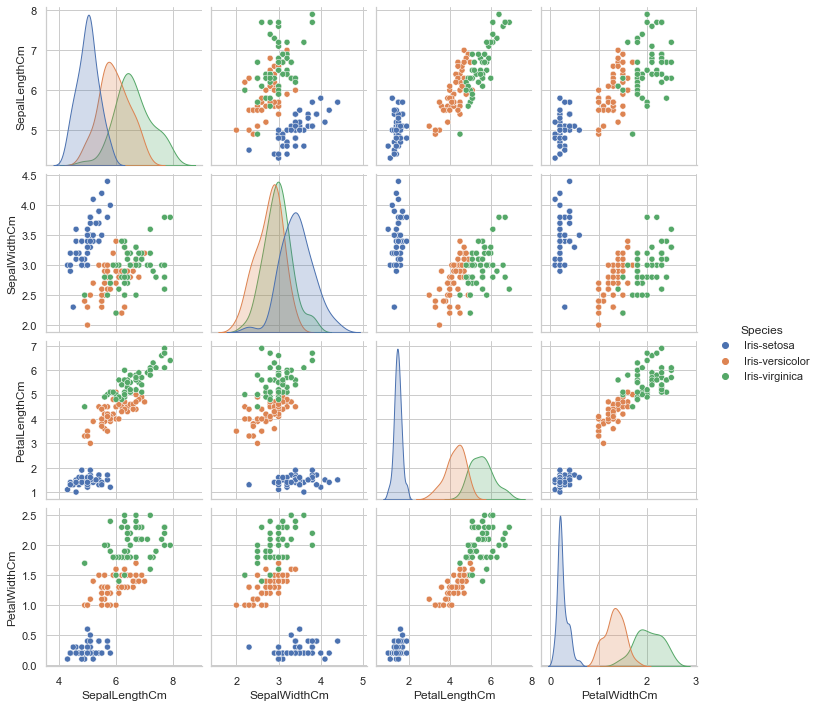

In [119]:
sns.pairplot(df, hue='Species')

The diagonal of the pair plot displays histograms (or kernel density estimations) of each feature for each species. These plots show the distribution of each feature within each species.

The off-diagonal plots show scatter plots of pairs of features. Iris-Setosa usually forms distinct clusters and is often well-separated from the other two species.

Versicolor and Virginica might overlap in some feature combinations, making it challenging to distinguish them solely based on these features.



<AxesSubplot:>

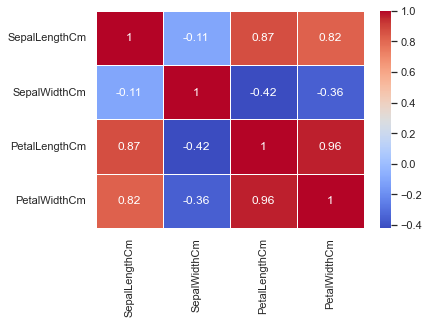

In [120]:
#Correlation Plot
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

There is strong positive correlation between some variables are observed. eg: PetalWidth and PetalLength is showing strong positive correlation.

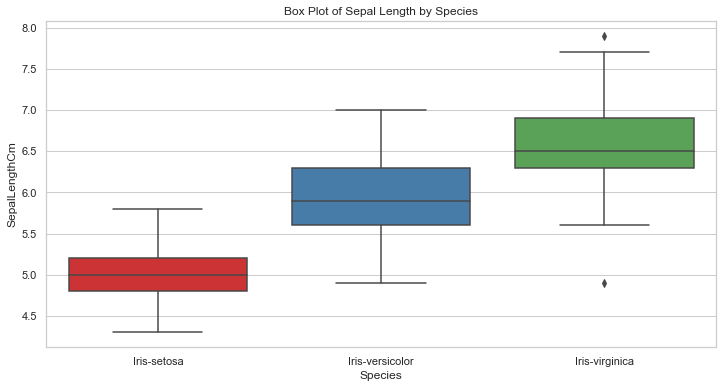

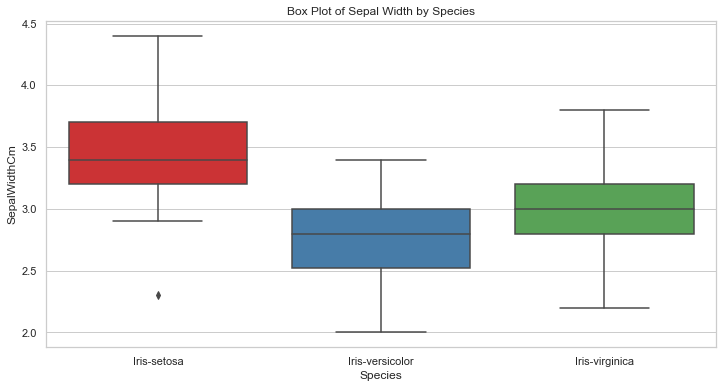

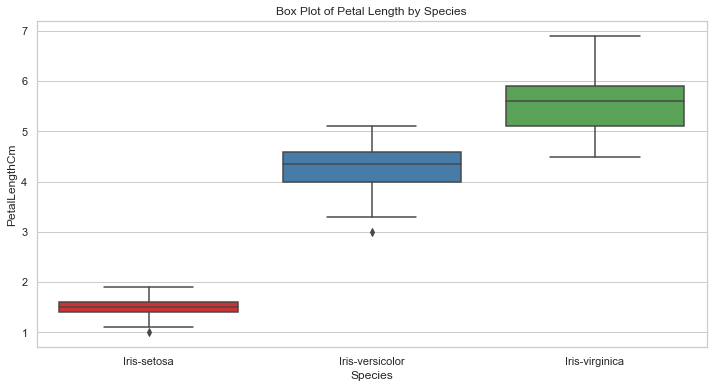

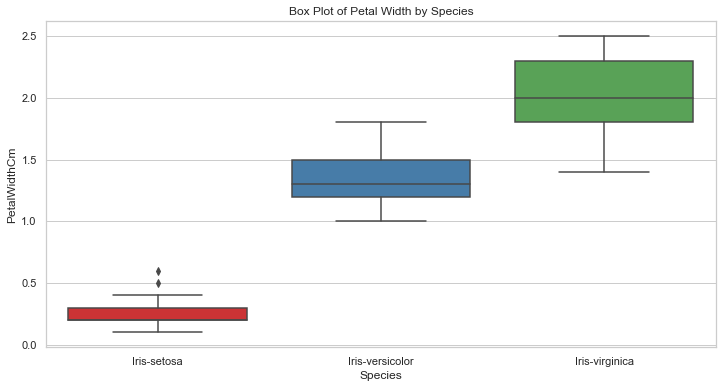

In [121]:
#Boxplot for each feature grouped by species
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(x="Species", y="SepalLengthCm", data=df, palette="Set1")
plt.title("Box Plot of Sepal Length by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="SepalWidthCm", data=df, palette="Set1")
plt.title("Box Plot of Sepal Width by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="PetalLengthCm", data=df, palette="Set1")
plt.title("Box Plot of Petal Length by Species")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Species", y="PetalWidthCm", data=df, palette="Set1")
plt.title("Box Plot of Petal Width by Species")
plt.show()

#### Label Encoding


In [122]:
from sklearn.preprocessing import LabelEncoder
cols=['Species']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Iris-setosa is encoded as 0

Iris-versicolor is encoded as 1

Iris-virginica is encoded as 2



#### Determining target variable and feature variable


In [123]:
# X is the fature variable
X = df.drop('Species', axis = 1)
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [124]:
# y is the target variable
y = df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 147, dtype: int32

#### Splitting the dataset into training and testing sets


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression


In [126]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)


In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,LR_pred)



array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [128]:
accuracy_score(y_test,LR_pred)

0.9333333333333333

In [129]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, LR_pred, average='weighted')
recall = recall_score(y_test, LR_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9333333333333333
Recall: 0.9333333333333333


In [130]:
from sklearn.metrics import f1_score 
f1_score = f1_score(y_test, LR_pred, average='weighted')
print("F1 Score:", f1_score)

F1 Score: 0.9333333333333333


In [131]:
from sklearn.metrics import classification_report
report = classification_report(y_test, LR_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Decision tree classifier


In [132]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_test)


In [133]:
confusion_matrix(y_test,DT_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]], dtype=int64)

In [134]:
accuracy_score(y_test,DT_pred)


0.9666666666666667

In [135]:
report = classification_report(y_test, DT_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Random forest


In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [137]:
# model evaluation
confusion_matrix(y_test,rfc_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [138]:
accuracy_score(y_test, rfc_pred)

0.9333333333333333

In [139]:
report = classification_report(y_test, rfc_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### K-nearest neighbour

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [141]:
confusion_matrix(y_test,knn_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]], dtype=int64)

In [142]:
accuracy_score(y_test,knn_pred)

0.9333333333333333

In [143]:
report = classification_report(y_test, knn_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In a classification problem, there are several model evaluation measures that help you assess the performance of your classifier. Here we used confusion matrix, accuracy score and classification report to evaluate the model.

For each model we got the same accuracy score of 0.933 indicates approximately 93.33% of the predictions made by the model match the actual true labels in the test set.

We have a 3x3 confusion matrix since we are evaluating a multiclass classification model. Each row in the matrix represents the true class, and each column represents the predicted class.

Classification report provides a comprehensive summary of the performance of a classification model by presenting various evaluation metrics such as precision, recall, F-1 score and support.